# EDA (exploratory data analysis) Synthanic
https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation

## Цель

**Ваша задача** состоит в том, чтобы предсказать, выжил ли пассажир при затоплении Synthanic (синтетический, гораздо больший набор данных, основанный на фактическом наборе данных Titanic). Для каждой строки PasengerId в тестовом наборе вы должны предсказать значение 0 или 1 для цели Survived.

**Ваша оценка** — это процент пассажиров, который вы правильно предсказали. Это известно как точность.
Файл отправки.

Вы должны отправить CSV-файл, содержащий ровно 100 000 строк плюс строку заголовка. В вашем представлении будет отображаться ошибка, если у вас есть дополнительные столбцы или дополнительные строки.

В файле должно быть ровно 2 столбца:

     PassengerId (в любом порядке)
     Выжил (содержит ваши двоичные прогнозы: 1 для выживших, 0 для умерших)


# Описание данных
* **Survived** / (0 = No, 1 = Yes) --- выжил или нет;
* **Pclass** / (1, 2, 3) --- класс билета;
* **Name** / (Фамилия, Имя) --- ФИО пассажира;
* **Sex** / (male,female) --- пол;
* **Age** / (float, null)  --- Возраст является дробным, если он меньше 1. Если возраст оценивается, то в форме xx.5;
* **SibSp** / (0,1,2) --- количество братьев и сестер за границей (определяет семейные отношения таким образом (Sibling = brother, sister, stepbrother, stepsister; Spouse = муж, жена (любовницы и женихи не учитывались)));
* **Parch** / (0,1,2) --- количество родителей/детей на борту (определяет семейные отношения таким образом (Parent = mother, father; Child = daughter, son, stepdaughter, stepson; Некоторые дети путешествовали только с няней, поэтому для них parch=0));
* **Ticket** / (string: [a-zA-Z./ 0-9]\*, null) --- номер билета
* **Fare** / (float, null) --- цена билета;
* **Cabin** / (string, null) --- Номер каюты
* **Embarked** / (C, S, Q, null) --- Порт погрузки


**SibSp**: 0,1,2,3,4,5,\_,\_,8  (73308,19758,3703,1635,1168,132,\_,\_,296)

**Parch**: 0,1,2,3,4,5,6,\_,\_,9 (73540,12996,11236,983,446,331,204,\_,\_,264)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column', None)

In [2]:
train_df = pd.read_csv('tabular-playground-series-apr-2021/train.csv')

In [3]:
print(f'train_df.shape: {train_df.shape}')
train_df.head()

train_df.shape: (100000, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
train_df.PassengerId.value_counts().sort_values()
train_df.PassengerId.describe()  # non-null

train_df.Survived.value_counts().sort_values()  # 1 -- 42774;  0 -- 57226; non-null
# train_df.Survived.info()

train_df.Pclass.value_counts().sort_values(ascending = False)  # больше пассажиров 3 класса (41006), 
                                                               # затем 1 (30315), и затем 2 (28679)
# train_df.Pclass.info()
# train_df.Pclass.describe()

train_df.Name.value_counts().sort_values()
train_df.Name.describe()  
# train_df.Name.info()  # non-null

train_df.Sex.value_counts().sort_values()
# train_df.Sex.describe()  # male (56114), female (43886)
# train_df.Sex.info()  # non-null

train_df.Age.value_counts().sort_values()
train_df.Age.describe()  # 
# train_df.Age.info()  # non-null
sum(train_df.Age.isnull())  # null 3292

train_df.SibSp.value_counts().sort_index()  # 0,1,2,3,4,5,_,_,8  (73308,19758,3703,1635,1168,132,296)
train_df.SibSp.describe()  # male (56114), female (43886)
# train_df.SibSp.info()  # non-null
# возможно в тесте есть

train_df.Parch.value_counts().sort_index()  # 0,1,2,3,4,5,6,_,_,9  (73540,12996,11236,983,446,331,204,264)
# train_df.Parch.describe()  # male (56114), female (43886)
# train_df.SibSp.info()  # non-null
# возможно в тесте есть


train_df.Ticket.value_counts().sort_values()  # 75331 разных билетов
train_df.Ticket.describe()  # count     95377
# train_df.Ticket.info()  # null 4623

train_df.Fare.value_counts().sort_index()  # 
train_df.Fare.describe()  # count     99866 
# train_df.Fare.info()  # null 134

train_df.Cabin.value_counts().sort_values()  # 
train_df.Cabin.describe()  # count     32134 
# train_df.Cabin.info()  # 
sum(train_df.Cabin.isnull())  # null 67866

train_df.Embarked.value_counts().sort_values()  # 
train_df.Embarked.describe()  # count     99750  
# train_df.Embarked.info()  # 
# sum(train_df.Embarked.isnull())  # null 250
train_df.Embarked.unique().tolist()  # count     99750  

pd.isna(train_df).sum()



PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [6]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


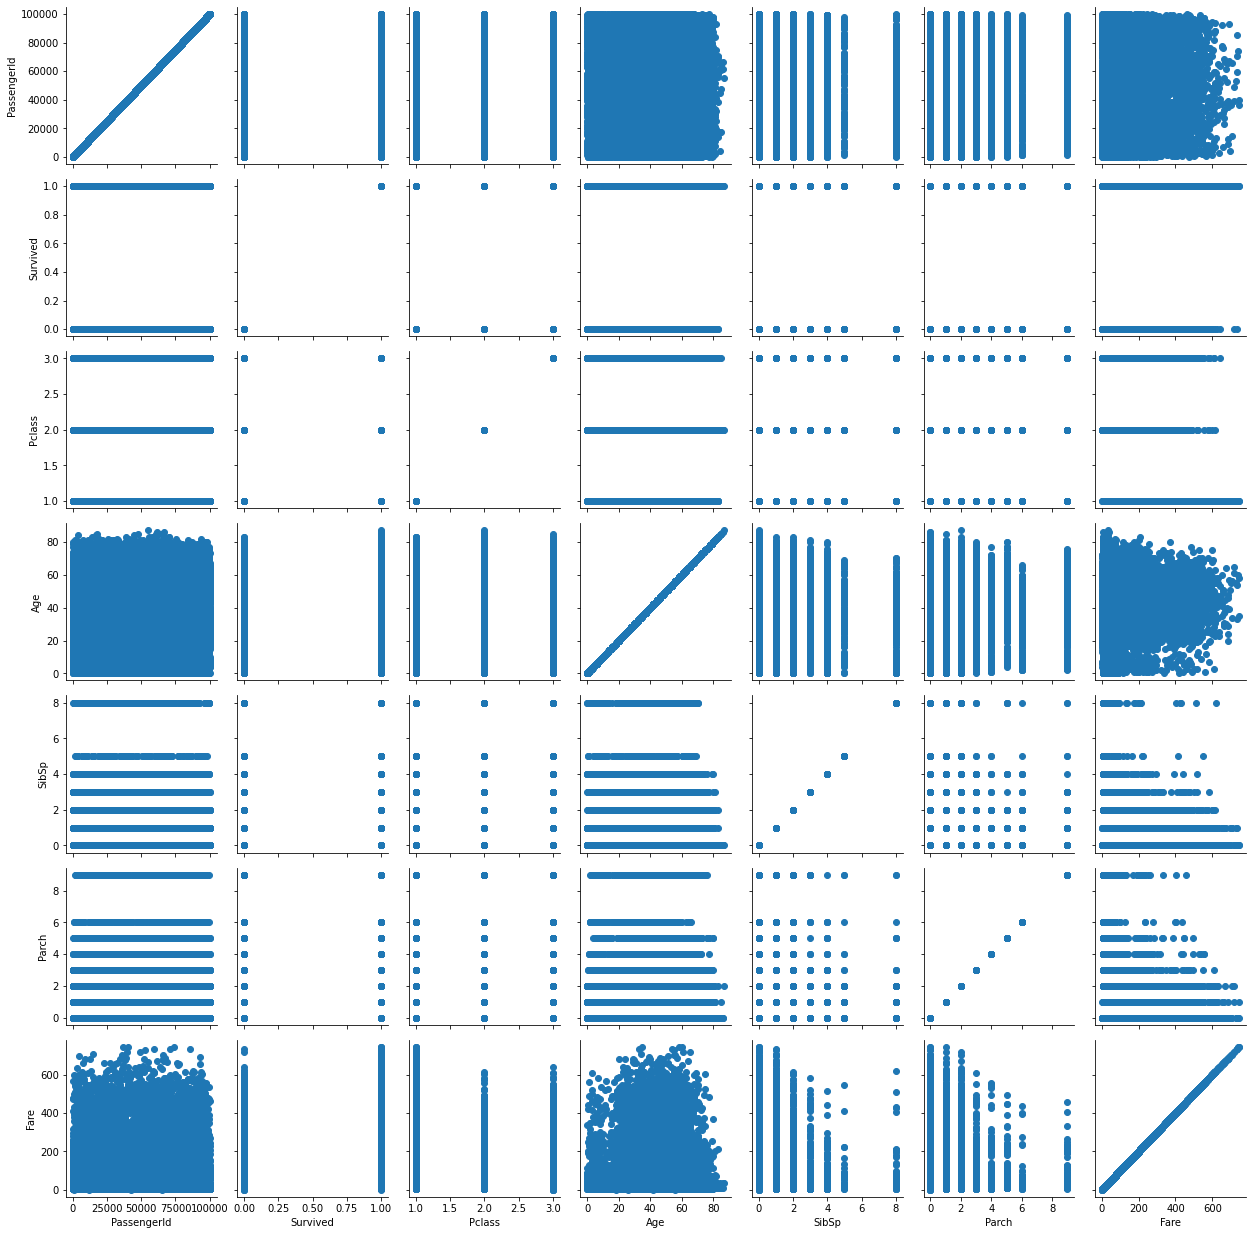

In [7]:
pair_grid_plot = sns.PairGrid(train_df)
pair_grid_plot.map(plt.scatter)

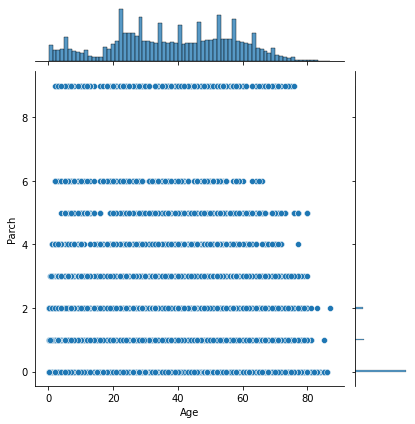

In [9]:
sns.jointplot(x='Age', y='Parch', data=train_df);

### Boxplot и гистограммы числовых признаков

In [10]:
print(train_df.columns.to_list())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [11]:
columns_names = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

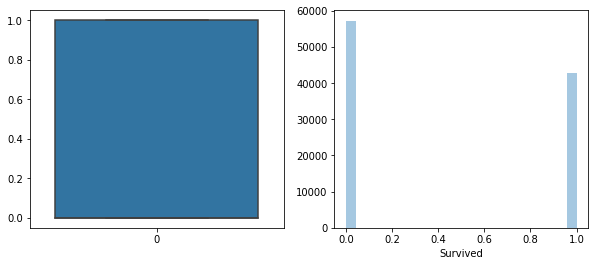

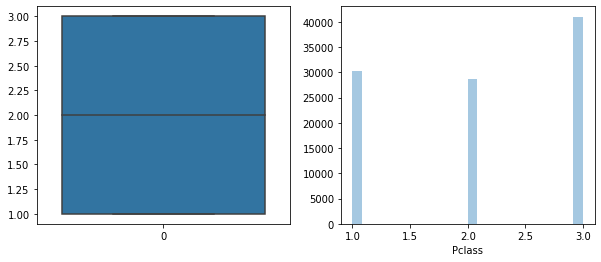

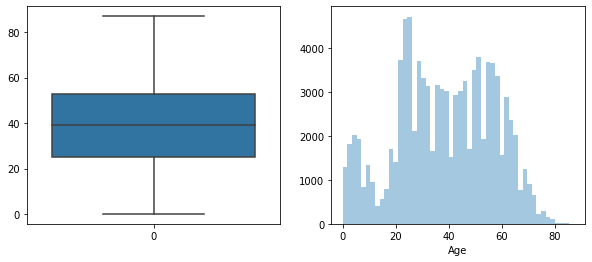

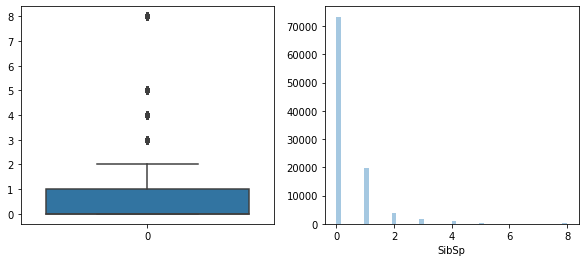

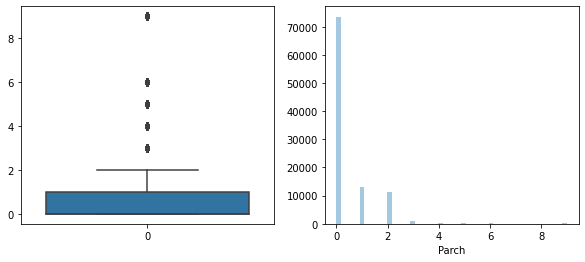

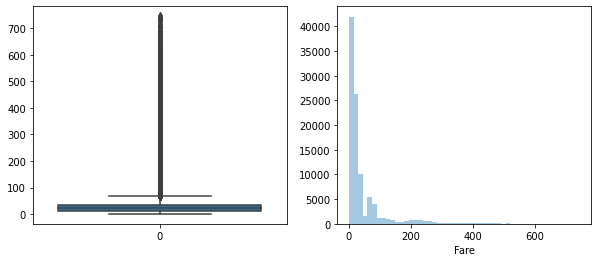

In [12]:
import warnings
# sns.set()
warnings.filterwarnings('ignore')
for feature in columns_names:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.boxplot(ax=axes[0], data=train_df[feature]) 
    sns.distplot(train_df[feature], ax=axes[1], kde = False)


### Соотношение выживших

Выжило: 42.774%


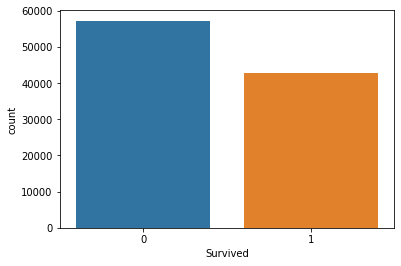

In [13]:
sns.countplot(x='Survived', data=train_df)
print(f'Выжило: {train_df.Survived.sum()/train_df.Survived.count()*100}%')

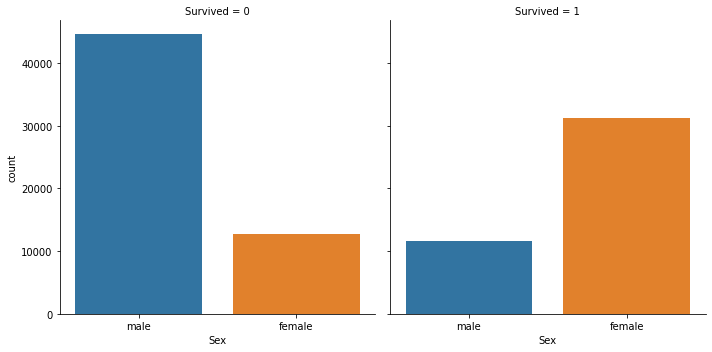

In [15]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train_df);

In [16]:
train_df_perc = (train_df.groupby(['Sex'])['Survived'].value_counts(normalize=True).round(2).to_frame('perc').reset_index())
train_df_perc

,Sex,Survived,perc
0,female,1,0.71
1,female,0,0.29
2,male,0,0.79
3,male,1,0.21


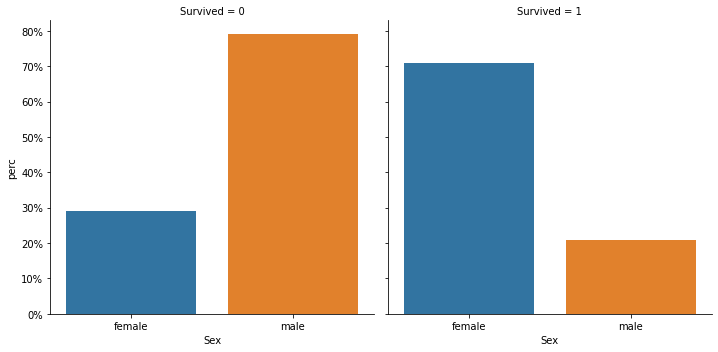

In [17]:
from matplotlib.ticker import PercentFormatter
p = sns.catplot(x='Sex', y='perc', col='Survived', kind='bar', data=train_df_perc)
for ax in p.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

### Выживаемость в зависимости от класса билета

In [18]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


In [19]:
print("Процент выживших в: ") 
print("Pclass=1 : ", train_df.Survived[train_df.Pclass == 1].sum()/train_df[train_df.Pclass == 1].Survived.count())
print("Pclass=2 : ", train_df.Survived[train_df.Pclass == 2].sum()/train_df[train_df.Pclass == 2].Survived.count())
print("Pclass=3 : ", train_df.Survived[train_df.Pclass == 3].sum()/train_df[train_df.Pclass == 3].Survived.count())

Процент выживших в: 
Pclass=1 :  0.5797789873000165
Pclass=2 :  0.5250183060776178
Pclass=3 :  0.24730527239916109


Text(0.5, 1.0, 'Выживаемость в зависимости от класса билета')

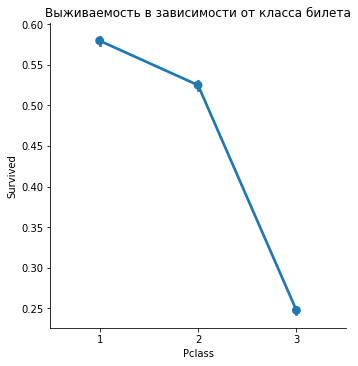

In [20]:
sns.catplot('Pclass','Survived', kind = 'point', data = train_df)
plt.title('Выживаемость в зависимости от класса билета')

Text(0.5, 1.0, 'Выживаемость в зависимости от класса билета и пола пассажира')

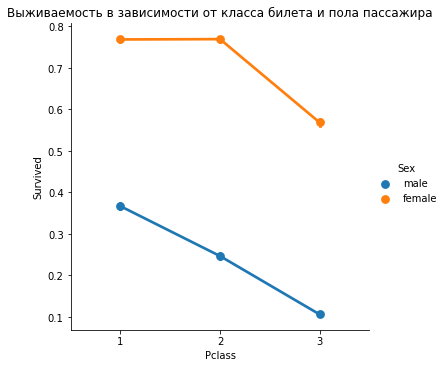

In [21]:
sns.catplot('Pclass','Survived',hue = 'Sex', kind = 'point', data = train_df)
plt.title('Выживаемость в зависимости от класса билета и пола пассажира')

### Выживаемость в зависимости от порта отправления

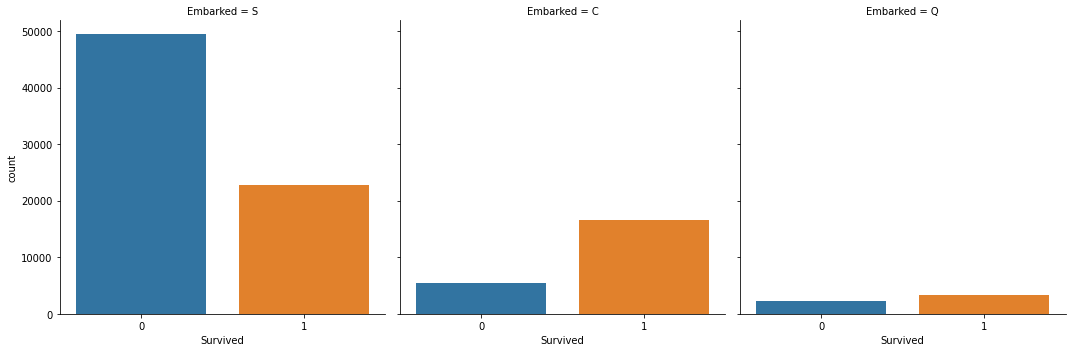

In [23]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_df);

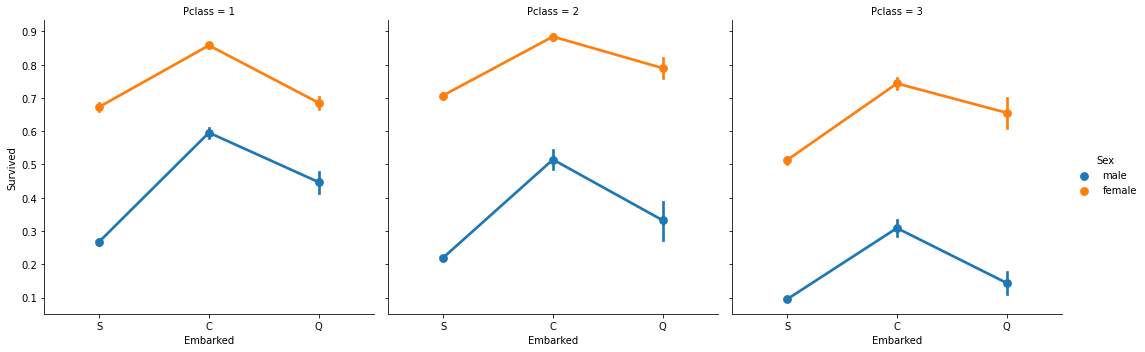

In [24]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data = train_df);

### Средняя стоимость билета в зависимости от класса, пола и порта отправления

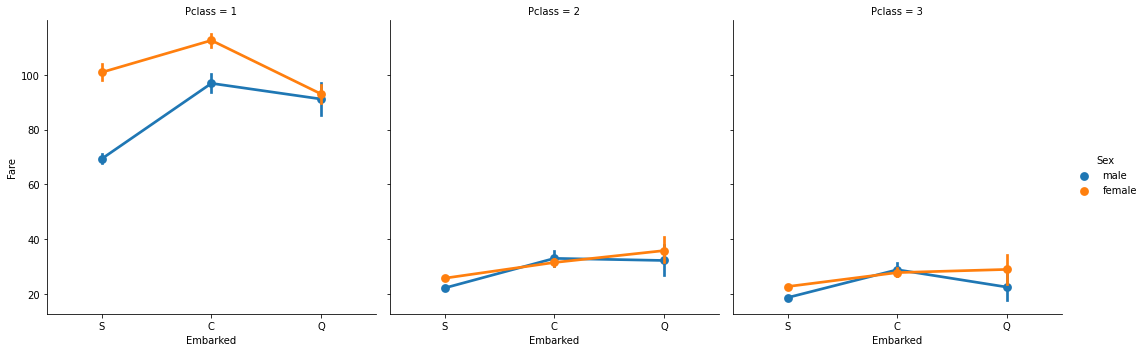

In [25]:
sns.catplot('Embarked','Fare', col='Pclass', hue= 'Sex', kind='point', data = train_df);

### кросстаблица выживаемости в зависимости от пола, класса билета и порта отправления

In [26]:
pd.crosstab([train_df.Survived], [train_df.Sex, train_df.Pclass, train_df.Embarked], margins=True).style.background_gradient(cmap = 'autumn_r')

### Корреляция всех переменных со всеми переменными

In [27]:
columns_names

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [30]:
train_df_ = train_df.copy()

train_df_ = pd.get_dummies(train_df_, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
train_df_.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)
train_df_.dropna(inplace=True)

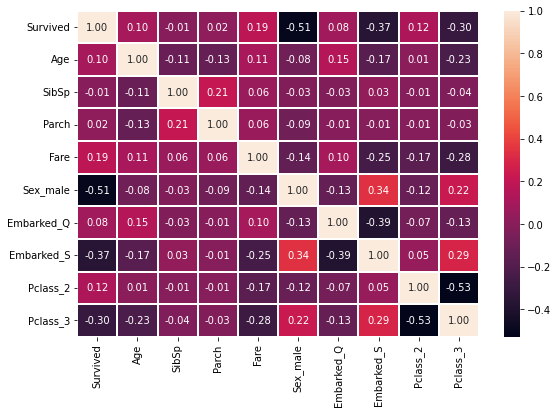

In [31]:
corr = train_df_.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()
